<a href="https://colab.research.google.com/github/Sujeet2003/Quora-Question-Pair/blob/main/Quora_Question_Pair_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/quora.csv')

In [3]:
sample_df = df.sample(30000, random_state=2)

In [4]:
sample_df

,id,qid1,qid2,question1,question2,is_duplicate
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0
...,...,...,...,...,...,...
185012,185158,365646,365647,What's the best place to visit for summer?,What is the best place to visit in summer?,1
277646,277866,546311,546312,How can I get over this girl?,How do I get over a girl I cannot be with?,1
387331,387648,757859,757860,How do I become a graphics designer?,Should I become a graphic designer?,0
279974,280197,550837,550838,How do I bake a cake in a microwave oven?,How do you bake cakes in a convection oven?,0


# Feature engineering on `30000 sample data` to keep data same as earlier notebook

In [5]:
sample_df.shape

(30000, 6)

In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 95166 to 293326
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


is_duplicate
0    18880
1    11120
Name: count, dtype: int64
is_duplicate
0    62.933333
1    37.066667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

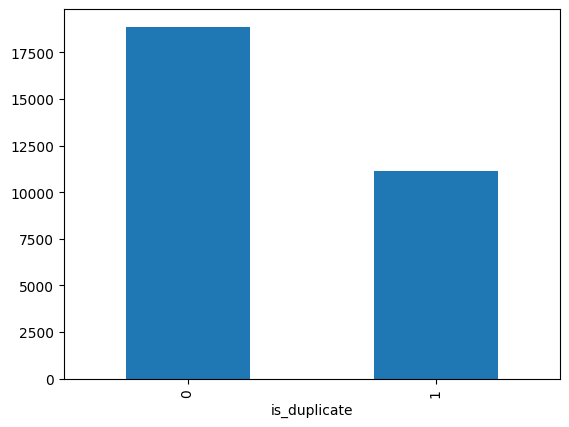

In [7]:
# distribution of duplicates and non-duplicates

print(sample_df['is_duplicate'].value_counts())
print((sample_df['is_duplicate'].value_counts()/sample_df['is_duplicate'].count())*100)

sample_df['is_duplicate'].value_counts().plot(kind='bar')

unique questions: 59832
Repeated questions: 145


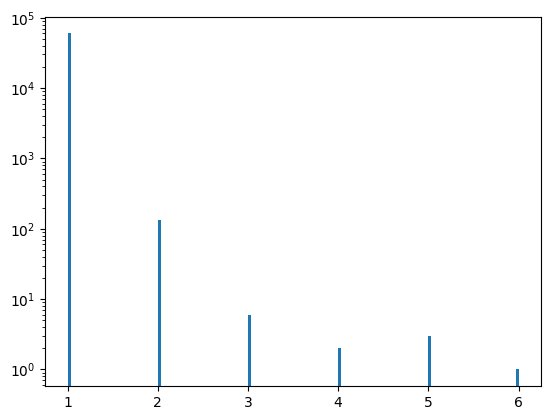

In [8]:
# distribution of repeated and non-repeated questions

ques_ids = pd.Series(list(sample_df['qid1']) + list(sample_df['qid2']))
print("unique questions:", np.unique(ques_ids).shape[0])

repeated = ques_ids.value_counts() > 1
print("Repeated questions:", repeated[repeated].shape[0])

plt.hist(ques_ids.value_counts().values, bins=150)
plt.yscale('log')
plt.show()

# Text Pre-Processing

In [9]:
# Defining a function for pre-processing to the text

from bs4 import BeautifulSoup
import re

def preprocess(question):
  q = str(question).lower().strip()

  # replacing the certain characters with it's corresponding strings
  q = q.replace("%", "percent")
  q = q.replace("$", "dollar")
  q = q.replace("₹", "rupee")
  q = q.replace("€", "euro")
  q = q.replace("@", "at")

  # The pattern `[math]` appearns in the datasets, so replacing to blank as: ""
  q = q.replace("[math]", "")

  # replacing numbers with it's corresponding string values
  q = q.replace(",000,000,000", "b ")
  q = q.replace(",000,000", "m ")
  q = q.replace(",000", "k ")
  q = re.sub(r"([0-9]+)000000000", r"\1b", q)
  q = re.sub(r"([0-9]+)000000", r"\1m", q)
  q = re.sub(r"([0-9]+)000", r"\1k", q)

  # decontractions of words
  # these datas found on: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953
  contractions = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is / how does",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
  }

  q_decontracted = []
  for word in q.split():
    if word in contractions:
      word = contractions[word]

    q_decontracted.append(word)

  q = " ".join(q_decontracted)
  q = q.replace("'ve", "have")
  q = q.replace("n't", "not")
  q = q.replace("'re", "are")
  q = q.replace("'ll'", "will")

  # removing HTML tags
  q = BeautifulSoup(q)
  q = q.get_text()

  # removing punctations
  pattern = re.compile("\W")
  q = re.sub(pattern, " ", q).strip()

  return q

In [10]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
95166,95241,189061,189062,Is Michelle Obama a transgender person?,What are the most attractive photos of Michell...,0
185366,185512,366337,366338,What's the main reason behind 500 & 1000 rs no...,Why are 500 and 1000 notes being banned in India?,1
178034,178179,351959,351960,Why England is not returning Kohinoor Diamond ...,Why won't Britain return the Koh-i-Noor Diamon...,1
366635,366934,718195,718196,What will a career in NABARD be like? How is i...,Is an engineer eligible for the NABARD assista...,0
215719,215887,425692,425693,Which MBA college should I opt for in Asia wit...,Which colleges can I get into with 770 GMAT sc...,0


In [11]:
sample_df['question1'] = sample_df['question1'].apply(preprocess)
sample_df['question2'] = sample_df['question2'].apply(preprocess)

# Feature Engineering done in `Notebook-2` which added more `7 columns` for each question as: `question length`, `words count`, `total words`, `common words` and `shared words`

In [12]:
# lengths of each question

sample_df['q1_len'] = sample_df['question1'].str.len()
sample_df['q2_len'] = sample_df['question2'].str.len()

In [13]:
sample_df.shape

(30000, 8)

In [14]:
# words in each questions

sample_df['q1_words_len'] = sample_df['question1'].apply(lambda x: len(x.split(" ")))
sample_df["q2_words_len"] = sample_df['question2'].apply(lambda x: len(x.split(" ")))

In [15]:
sample_df.shape

(30000, 10)

In [16]:
# total words

sample_df['total_words'] = sample_df['q1_words_len'] + sample_df['q2_words_len']

In [17]:
sample_df.shape

(30000, 11)

In [18]:
# common words

def common_words(row):
  words1 = set(map(lambda x: x.lower().strip(), row['question1'].split()))
  words2 = set(map(lambda x: x.lower().strip(), row['question2'].split()))
  return len(words1 & words2)

In [19]:
sample_df["common_words_len"] = sample_df.apply(common_words, axis=1)

In [20]:
sample_df.shape

(30000, 12)

In [21]:
# shared words

sample_df['shared_words'] = np.round(sample_df["common_words_len"]/sample_df["total_words"], 2)

In [22]:
sample_df.shape

(30000, 13)

In [23]:
sample_df.sample()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,total_words,common_words_len,shared_words
328234,328499,131542,644261,is there life on other planets,is there life on other planets and are they mo...,1,30,65,6,13,19,6,0.32


In [24]:
sample_df.shape

(30000, 13)

**`NOTE`**: we have added `7 columns` using feature engineering into previous notebook.

# Advanced Feature Engineering

### `Token Based` features
1. `Common Words Count (CWC) Minimum`: Number of common words count / min(word count of A, word count of B)
2. `Common Words Count (CWC) Maximum`: Number of common words count / max(word count of A, word count of B)
3. `Common Stop Words Count (CSC) Minimum`: Number of stop words count / min(stop count of A, stop count of B)
4. `Common Stop Words Count (CSC) Maximum`: Number of stop words count / max(stop count of A, stop count of B)
5. `Common Tokens Count (CSC) Minimum`: Number of total tokens count / min(token count of A, token count of B)
6. `Common Tokens Count (CSC) Maximum`: Number of total tokens count / max(token count of A, token count of B)
7. `Last Word Equal`: If `last word` of both documents are equal then `1` else `0`
8. `First Word Equal`: If `first word` of both documents are equal then `1` else `0`

### `Length Based` features
1. `Mean Length`: (token count of A + token count of B)/2
2. `Absolute Mean Difference`: abs((token count of A - token count of B)/2)
3. `Longest Substring Ratio`: length of longest
common substring/max(len of string A, length of string B)

### `Fuzzy` features
1. `Fuzzy Ratio:` It genearlly compares the two strings using *Levenshtein distance*.
2. `Fuzzy Partial Ratio:` Compares the strings based on `smaller string` to `larger string`, that means whether all smaller words are found in larger strings or not.
3. `Token Sort Ratio:` This technique compares the string after `sorting` the all tokens from both the string.
4. `Token Set Ratio:` Instead of just using sorting technique, it makes the `set` of each strings and then after `sorting`, compares the string of `set-1` to string of `set-2`.

In [25]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# token based features

from nltk.corpus import stopwords

def apply_token_features(row):
  q1 = row["question1"]
  q2 = row['question2']

  SAFE_DIV = 0.0001
  STOP_WORDS = stopwords.words("english")

  token_features = [0.0]*8

  # split strings into tokens
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return token_features

  # remove stopwords from each questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  # getting stop words from each questions
  q1_stop_words = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stop_words = set([word for word in q2_tokens if word in STOP_WORDS])

  # get common non-stopwords from both questions
  common_words_count = len(q1_words.intersection(q2_words))

  # get common stop words count
  common_stopwords_count = len(q1_stop_words.intersection(q2_stop_words))

  # get commom token
  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

  # token features
  # common words count minimum
  token_features[0] = common_words_count/(min(len(q1_words), len(q2_words)) + SAFE_DIV)

  # common words count maximum
  token_features[1] = common_words_count/(max(len(q1_words), len(q2_words)) + SAFE_DIV)

  # common stop words count minimum
  token_features[2] = common_stopwords_count/(min(len(q1_stop_words), len(q2_stop_words)) + SAFE_DIV)

  # common stop words count minimum
  token_features[3] = common_stopwords_count/(max(len(q1_stop_words), len(q2_stop_words)) + SAFE_DIV)

  # common token count minimum
  token_features[4] = common_token_count/(min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

  # common token count minimum
  token_features[5] = common_token_count/(max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

  # last words of both questions, if same then 1 else 0
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

  # first words of both questions, if same then 1 else 0
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_features

In [27]:
token_features = sample_df.apply(apply_token_features, axis=1)

In [28]:
sample_df['cwc_min'] = list(map(lambda x: x[0], token_features))
sample_df['cwc_max'] = list(map(lambda x: x[1], token_features))
sample_df['csc_min'] = list(map(lambda x: x[2], token_features))
sample_df['csc_max'] = list(map(lambda x: x[3], token_features))
sample_df['ctc_min'] = list(map(lambda x: x[4], token_features))
sample_df['ctc_max'] = list(map(lambda x: x[5], token_features))
sample_df['last_word'] = list(map(lambda x: x[6], token_features))
sample_df['first_word'] = list(map(lambda x: x[7], token_features))

In [29]:
sample_df.shape

(30000, 21)

In [30]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,...,common_words_len,shared_words,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word,first_word
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,2,0.13,0.499988,0.499988,0.000000,0.000000,0.333328,0.222220,0.0,0.0
185366,185512,366337,366338,what has what is the main reason behind 500 ...,why are 500 and 1k notes being banned in india,1,143,46,32,10,...,5,0.12,0.799984,0.285712,0.199996,0.111110,0.499995,0.192307,1.0,0.0
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,5,0.23,0.333328,0.333328,0.749981,0.499992,0.499995,0.416663,1.0,1.0
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,2,0.06,0.166664,0.099999,0.249994,0.099999,0.199998,0.086956,0.0,0.0
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,5,0.20,0.399992,0.285710,0.599988,0.374995,0.499995,0.333331,0.0,1.0


In [31]:
! pip install Distance

In [32]:
# length based features

import distance

def apply_length_feature(row):
  q1 = row['question1']
  q2 = row['question2']

  length_features = [0.0]*3

  # converting strings/questions into tokens
  q1_tokens = q1.lower().split()
  q2_tokens = q2.lower().split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
    return length_features

  # mean length
  length_features[0] = (len(q1_tokens) + len(q2_tokens))/2

  # absolute length features
  length_features[1] = abs(len(q1_tokens) - len(q2_tokens))

  # longest substring ratio
  strings = list(distance.lcsubstrings(q1, q2))
  if strings:
      longest_substring_length = len(strings[0])
  else:
      longest_substring_length = 0
  length_features[2] = longest_substring_length / (min(len(q1), len(q2)) + 1)

  return length_features

In [33]:
length_features = sample_df.apply(apply_length_feature, axis=1)

In [34]:
sample_df["mean_length"] = list(map(lambda x: x[0], length_features))
sample_df["abs_mean_length"] = list(map(lambda x: x[1], length_features))
sample_df["longest_substr_ratio"] = list(map(lambda x: x[2], length_features))

In [35]:
sample_df.shape

(30000, 24)

In [36]:
! pip install FuzzyWuzzy

In [37]:
# fuzzy based features

from fuzzywuzzy import fuzz
def apply_fuzzy_features(row):
  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4

  # fuzzy ratio
  fuzzy_features[0] = fuzz.QRatio(q1, q2)

  # partial ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

  # token sort ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

  # token set ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features

In [38]:
fuzzy_features = sample_df.apply(apply_fuzzy_features, axis=1)

In [39]:
sample_df['fuzzy_ratio'] = list(map(lambda x: x[0], fuzzy_features))
sample_df['fuzzy_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
sample_df['fuzzy_token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
sample_df['fuzzy_token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [40]:
sample_df.shape

(30000, 28)

In [41]:
sample_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,...,ctc_max,last_word,first_word,mean_length,abs_mean_length,longest_substr_ratio,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_token_set_ratio
95166,95241,189061,189062,is michelle obama a transgender person,what are the most attractive photos of michell...,0,38,53,6,9,...,0.222220,0.0,0.0,7.5,3.0,0.384615,37,55,53,54
185366,185512,366337,366338,what has what is the main reason behind 500 ...,why are 500 and 1k notes being banned in india,1,143,46,32,10,...,0.192307,1.0,0.0,18.0,16.0,0.234043,40,67,42,63
178034,178179,351959,351960,why england is not returning kohinoor diamond ...,why will not britain return the koh i noor dia...,1,59,59,10,12,...,0.416663,1.0,1.0,11.0,2.0,0.216667,71,71,73,78
366635,366934,718195,718196,what will a career in nabard be like how is i...,is an engineer eligible for the nabard assista...,0,120,61,25,10,...,0.086956,0.0,0.0,16.5,13.0,0.145161,36,43,34,35
215719,215887,425692,425693,which mba college should i opt for in asia wit...,which colleges can i get into with 770 gmat score,0,67,49,15,10,...,0.333331,0.0,1.0,12.5,5.0,0.220000,66,63,71,71


# EDA on new added features

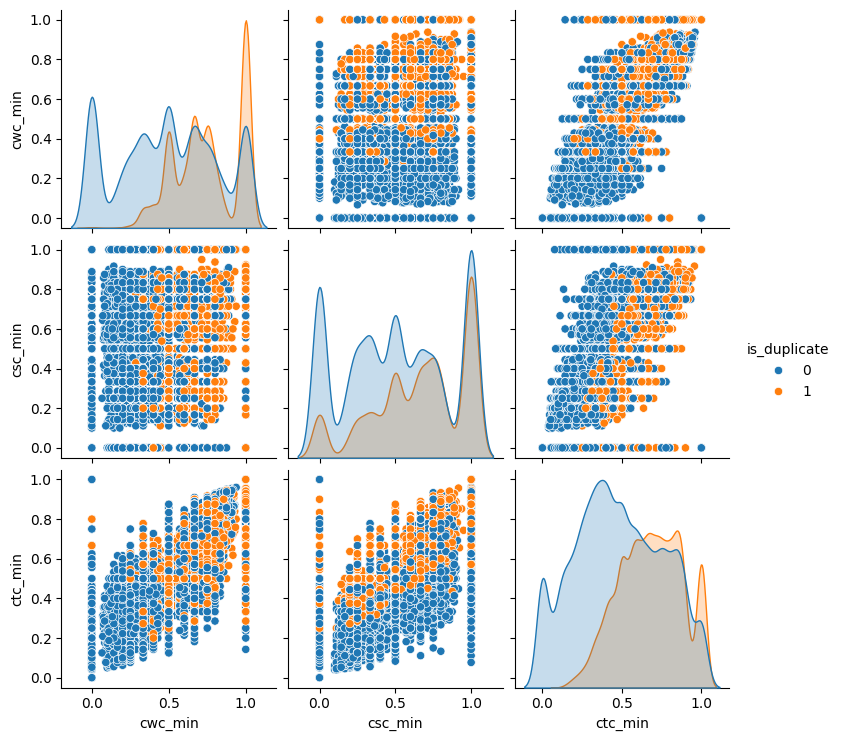

In [42]:
sns.pairplot(sample_df[['cwc_min', 'csc_min', 'ctc_min', 'is_duplicate']], hue="is_duplicate")

**Conclusion**: Here we can say that `non-duplicate curve` is `mostly dominating`, so these features can good for our model.

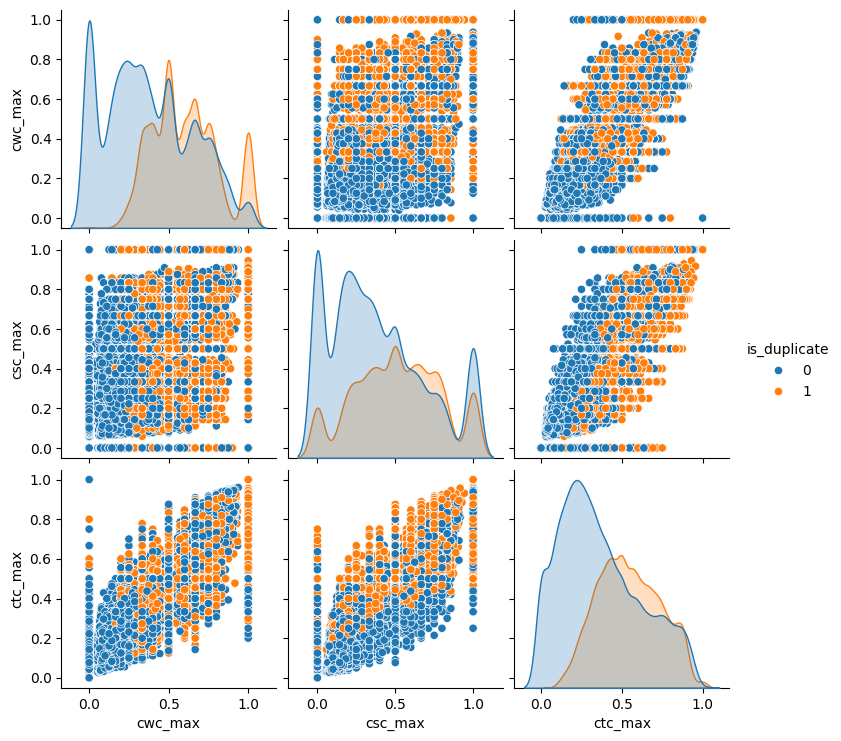

In [43]:
sns.pairplot(sample_df[['cwc_max', 'csc_max', 'ctc_max', 'is_duplicate']], hue="is_duplicate")

<Figure size 1400x600 with 0 Axes>

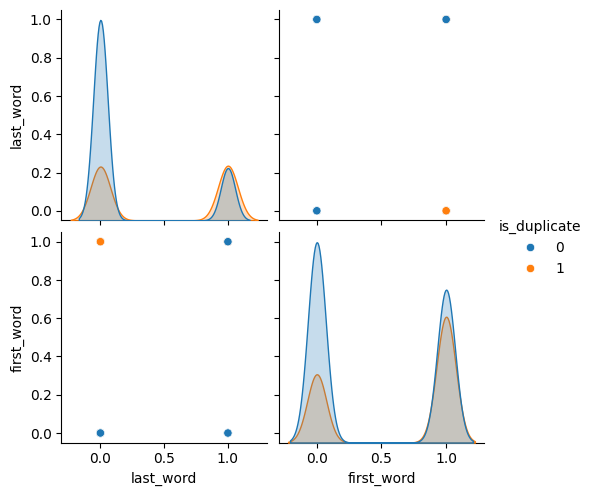

In [44]:
fig = plt.figure(figsize=(14, 6))
sns.pairplot(sample_df[['last_word', 'first_word', 'is_duplicate']], hue="is_duplicate")

**Conclusion**: Here, `Blue curve` is mostly dominating so, we can say that if `first and last words are not same` then there is more chances to be `non-duplicate`.

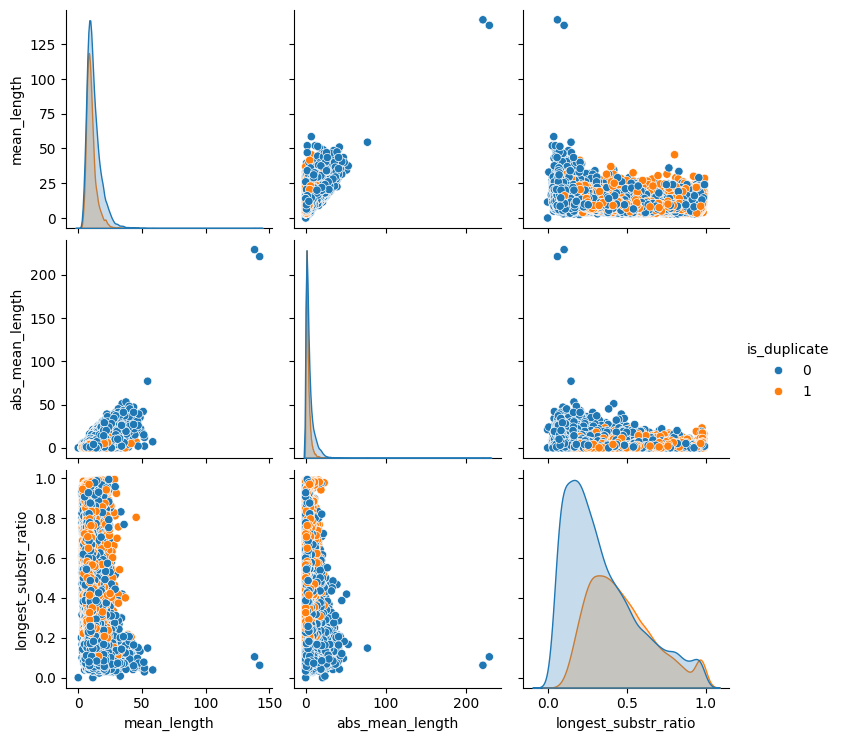

In [45]:
sns.pairplot(sample_df[['mean_length', 'abs_mean_length', 'longest_substr_ratio', 'is_duplicate']], hue='is_duplicate')

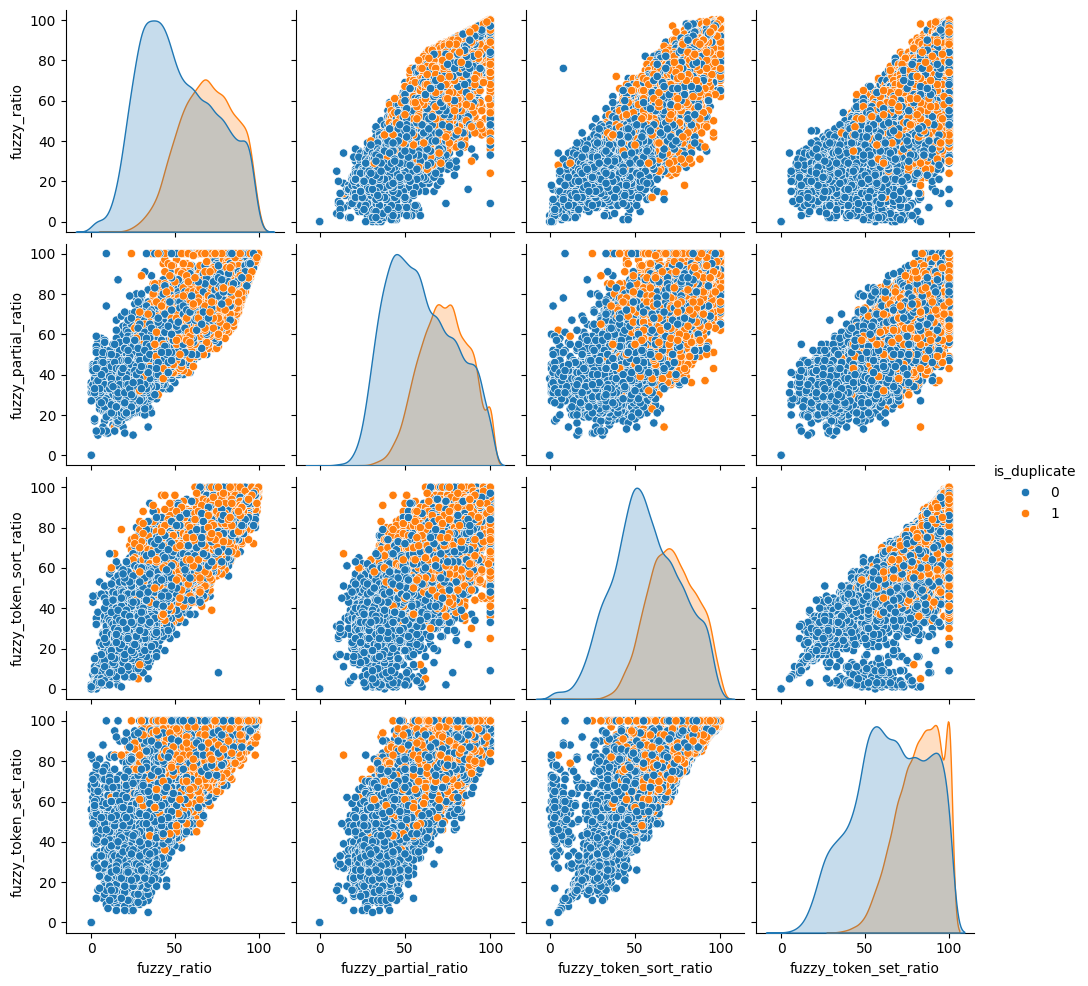

In [46]:
sns.pairplot(sample_df[['fuzzy_ratio', 'fuzzy_partial_ratio', 'fuzzy_token_sort_ratio', 'fuzzy_token_set_ratio', 'is_duplicate']], hue='is_duplicate')

# Model Training

In [47]:
ques_df = sample_df[['question1', 'question2']]

In [48]:
sample_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_words_len', 'q2_words_len', 'total_words',
       'common_words_len', 'shared_words', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word', 'first_word',
       'mean_length', 'abs_mean_length', 'longest_substr_ratio', 'fuzzy_ratio',
       'fuzzy_partial_ratio', 'fuzzy_token_sort_ratio',
       'fuzzy_token_set_ratio'],
      dtype='object')

In [49]:
final_df = sample_df.drop(columns=['id', 'qid1', 'qid2', 'question1', 'question2'])

In [50]:
final_df

,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,total_words,common_words_len,shared_words,cwc_min,cwc_max,...,ctc_max,last_word,first_word,mean_length,abs_mean_length,longest_substr_ratio,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_token_set_ratio
95166,0,38,53,6,9,15,2,0.13,0.499988,0.499988,...,0.222220,0.0,0.0,7.5,3.0,0.384615,37,55,53,54
185366,1,143,46,32,10,42,5,0.12,0.799984,0.285712,...,0.192307,1.0,0.0,18.0,16.0,0.234043,40,67,42,63
178034,1,59,59,10,12,22,5,0.23,0.333328,0.333328,...,0.416663,1.0,1.0,11.0,2.0,0.216667,71,71,73,78
366635,0,120,61,25,10,35,2,0.06,0.166664,0.099999,...,0.086956,0.0,0.0,16.5,13.0,0.145161,36,43,34,35
215719,0,67,49,15,10,25,5,0.20,0.399992,0.285710,...,0.333331,0.0,1.0,12.5,5.0,0.220000,66,63,71,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185012,1,53,41,13,9,22,8,0.36,0.999975,0.999975,...,0.727266,1.0,1.0,10.0,2.0,0.761905,83,93,85,96
277646,1,28,41,7,11,18,5,0.28,0.999950,0.666644,...,0.454541,0.0,1.0,9.0,4.0,0.413793,61,75,75,81
387331,0,35,34,7,6,13,4,0.31,0.666644,0.666644,...,0.571420,1.0,0.0,6.5,1.0,0.542857,90,88,81,87
279974,0,40,42,10,9,19,6,0.32,0.499988,0.499988,...,0.599994,1.0,1.0,9.5,1.0,0.170732,78,75,63,78


# Applying `Bag of Words`

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [52]:
temp_df1 = pd.DataFrame(q1_array, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_array, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [53]:
final_df = pd.concat([final_df, temp_df], axis=1)
final_df.shape

(30000, 6023)

In [54]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,total_words,common_words_len,shared_words,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
95166,0,38,53,6,9,15,2,0.13,0.499988,0.499988,...,0,0,0,0,0,0,0,0,0,0
185366,1,143,46,32,10,42,5,0.12,0.799984,0.285712,...,0,0,0,0,0,0,0,0,0,0
178034,1,59,59,10,12,22,5,0.23,0.333328,0.333328,...,0,0,0,0,0,0,0,0,0,0
366635,0,120,61,25,10,35,2,0.06,0.166664,0.099999,...,0,0,0,0,0,0,0,0,0,0
215719,0,67,49,15,10,25,5,0.20,0.399992,0.285710,...,0,0,0,0,0,0,0,0,0,0


# Model training

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7858333333333334

**Conclusion**: `Accuracy is approx 79` using `Random Forest`

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7846666666666666

**Conclusion**: `Accuracy is approx 78` using `XG Boost`

# Applying TF-IDF

In [58]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# questions = list(ques_df['question1']) + list(ques_df['question2'])
# cv = TfidfVectorizer(max_features=3000)
# q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(), 2)


In [59]:
# temp_df1 = pd.DataFrame(q1_array, index=ques_df.index)
# temp_df2 = pd.DataFrame(q2_array, index=ques_df.index)
# temp_df = pd.concat([temp_df1, temp_df2], axis=1)
# temp_df.shape

In [60]:
# final_df = pd.concat([final_df, temp_df], axis=1)
# final_df.shape

In [61]:
# final_df.head()

# Models for TF-IDf

In [62]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:].values, final_df.iloc[:, 0].values, test_size=0.2, random_state=42)

In [63]:
# # applying random forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# accuracy_score(y_test, y_pred)

**Conclusion**: Using `Tf-IDF`, with the `Random forest` we are having `accuracy is approx 78`

In [64]:
# # applying xgboost
# from xgboost import XGBClassifier

# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)
# accuracy_score(y_test, y_pred)

**Conclusion**: Using `Tf-IDF`, with the `XG Boost` we are having `accuracy is approx 78`